In [1]:
import pandas as pd

df = pd.read_csv("preprocessed_content.csv")

print(df.head())

   Unnamed: 0          filename ticker  year  \
0           0  ASX_BSX_2020.pdf    BSX  2020   
1           1  ASX_BSX_2022.pdf    BSX  2022   
2           2  ASX_EXR_2022.pdf    EXR  2022   
3           3  LSE_ADM_2019.pdf    ADM  2019   
4           4  LSE_ADM_2020.pdf    ADM  2020   

                                preprocessed_content  \
0  style guide colour colour use imagecolour prof...   
1  sustainability report look mining green office...   
2  report environment social governance esg basel...   
3  corporate social responsibilty report introduc...   
4  sustainability admiral commit maintain respons...   

                                        ner_entities  e_score  s_score  \
0  ['bk%', 'rgb', 'un', 'el ectric mine consortiu...     3.16    18.00   
1  ['murray street', 'west perth', 'west perth', ...     2.83    12.86   
2  ['september', 'mongolia', 'australia', 'austra...     3.81     4.28   
3  ['david stevens', 'csr board', 'just over  yea...    16.38    14.20   
4  [

# Phase 1: Exploratory Data Analysis

TF-IDF Analysis : Identifying frequently discussed topics and relevant words across sustainability reports using Term Frequency-Inverse Document Frequency (TF-IDF) to uncover dominant themes and concepts within reports.

Word Cloud Visualizations: Creating word clouds for the overall corpus and by individual ESG components (E, S, and G) to visually highlight frequently occurring words.

Optional: Correlation heatmaps of ESG scores, score distributions, and frequency histograms for each ESG component will help identify patterns across years, industries, and companies

### Statistical Overview of ESG Scores

Descriptive Statistics for ESG Scores:
          e_score     s_score     g_score  total_score
count  866.000000  866.000000  866.000000   866.000000
mean     5.904134   10.272229    7.423741    23.612240
std      5.684071    4.013380    2.532303     7.574159
min      0.010000    1.280000    3.160000     6.990000
25%      1.662500    7.542500    5.622500    17.822500
50%      3.735000    9.855000    6.820000    22.710000
75%      9.027500   12.875000    8.640000    28.760000
max     24.840000   26.870000   16.470000    46.510000


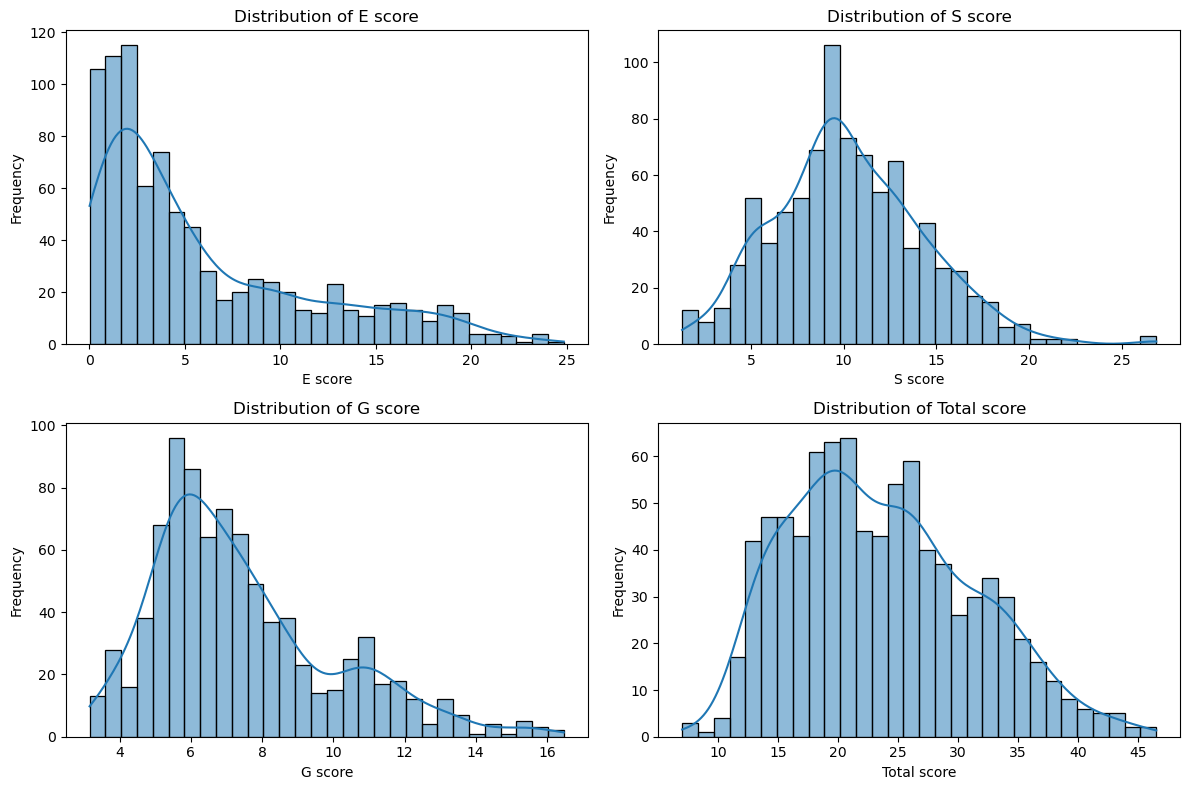

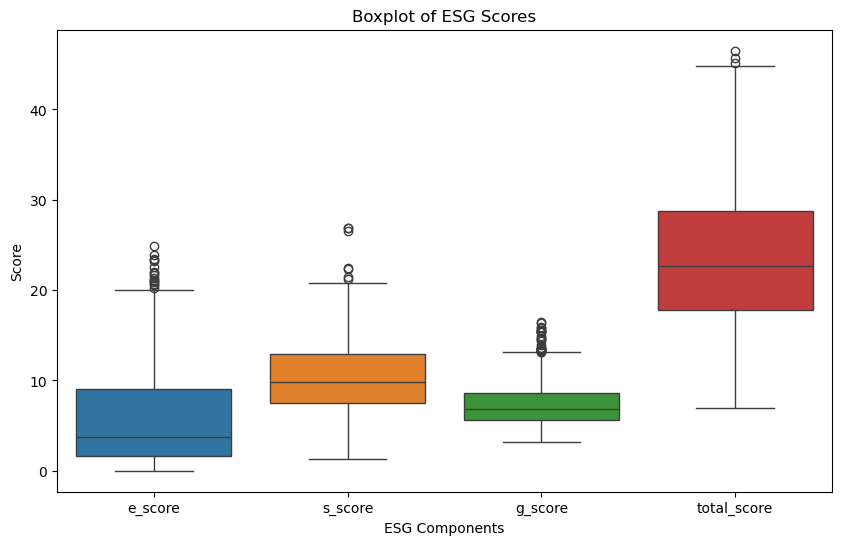

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic descriptive statistics for ESG scores
esg_scores = df[['e_score', 's_score', 'g_score', 'total_score']]
print("Descriptive Statistics for ESG Scores:")
print(esg_scores.describe())

# Plot histograms for each ESG component and total score
plt.figure(figsize=(12, 8))
for i, score in enumerate(['e_score', 's_score', 'g_score', 'total_score'], 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[score], kde=True, bins=30)
    plt.title(f"Distribution of {score.replace('_', ' ').capitalize()}")
    plt.xlabel(score.replace('_', ' ').capitalize())
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Optional: Boxplot to show score distributions
plt.figure(figsize=(10, 6))
sns.boxplot(data=esg_scores)
plt.title("Boxplot of ESG Scores")
plt.xlabel("ESG Components")
plt.ylabel("Score")
plt.show()

### Correlational Analysis

Correlation Matrix for ESG Scores:
              e_score   s_score   g_score  total_score
e_score      1.000000 -0.029369 -0.158549     0.682293
s_score     -0.029369  1.000000  0.412967     0.645694
g_score     -0.158549  0.412967  1.000000     0.433859
total_score  0.682293  0.645694  0.433859     1.000000


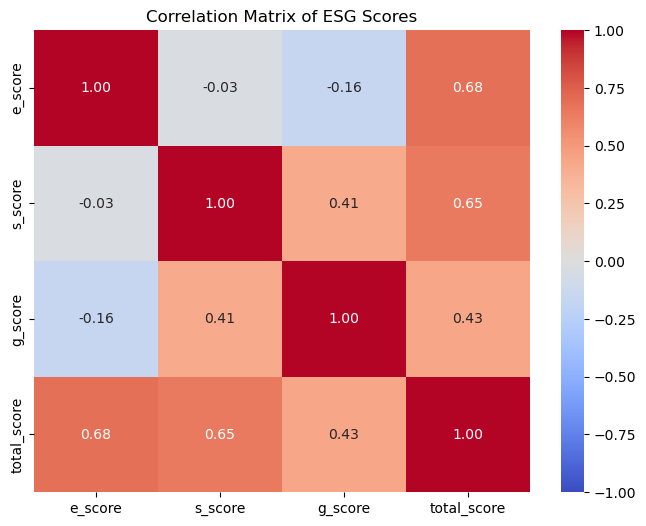

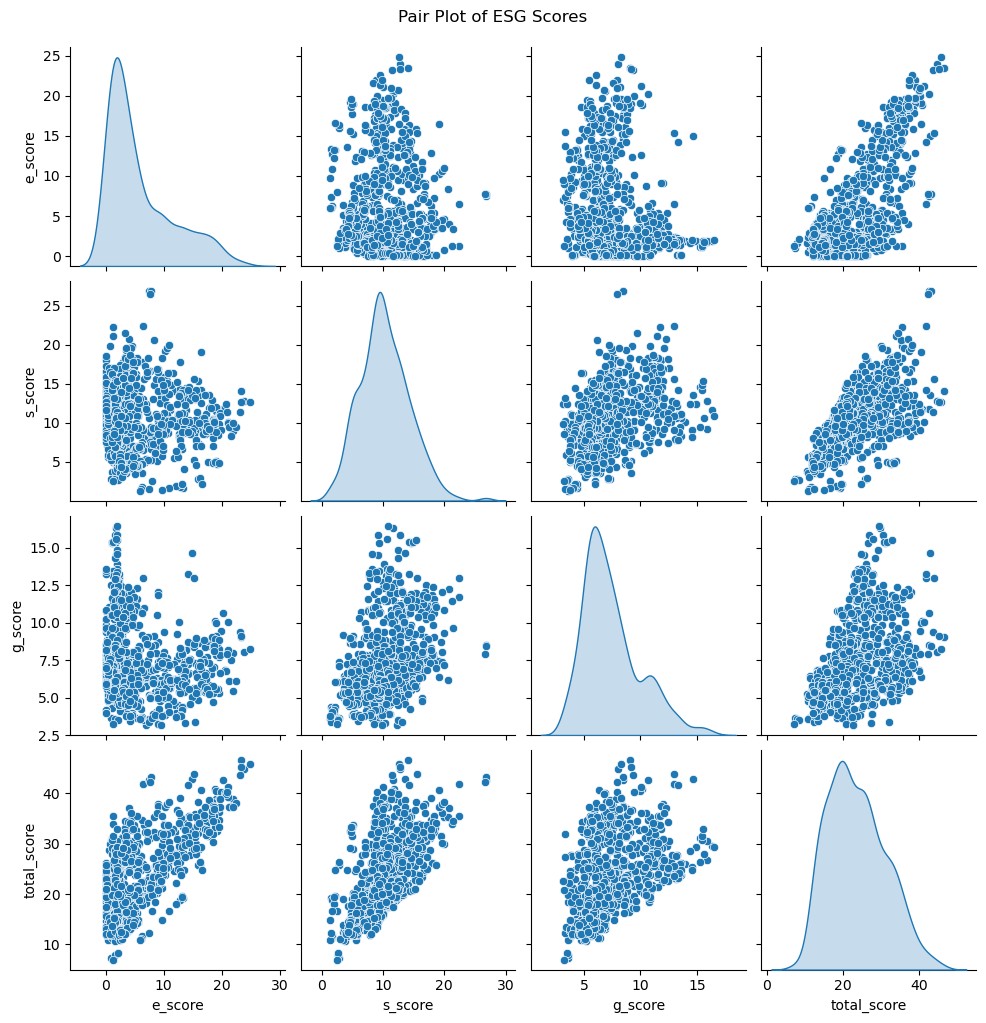

In [7]:
# Calculate the correlation matrix for ESG scores
correlation_matrix = df[['e_score', 's_score', 'g_score', 'total_score']].corr()
print("Correlation Matrix for ESG Scores:")
print(correlation_matrix)

# Plotting the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix of ESG Scores")
plt.show()

# Optional: Pair Plot to explore pairwise relationships visually
sns.pairplot(df[['e_score', 's_score', 'g_score', 'total_score']], diag_kind='kde')
plt.suptitle("Pair Plot of ESG Scores", y=1.02)  # y=1.02 adjusts the title position slightly upward
plt.show()

### Temporal Trends

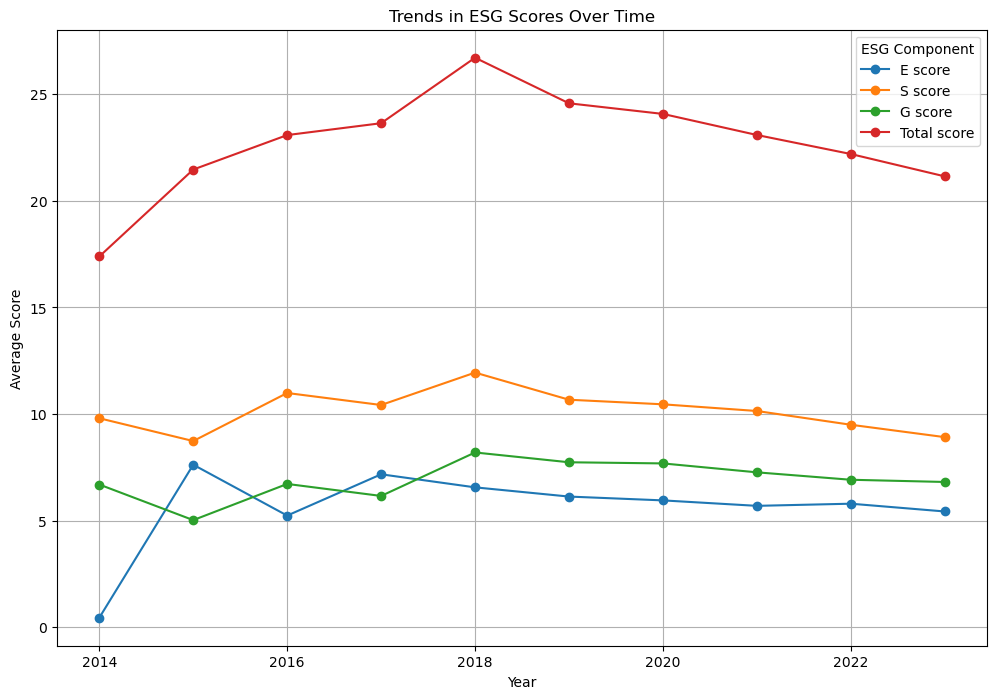

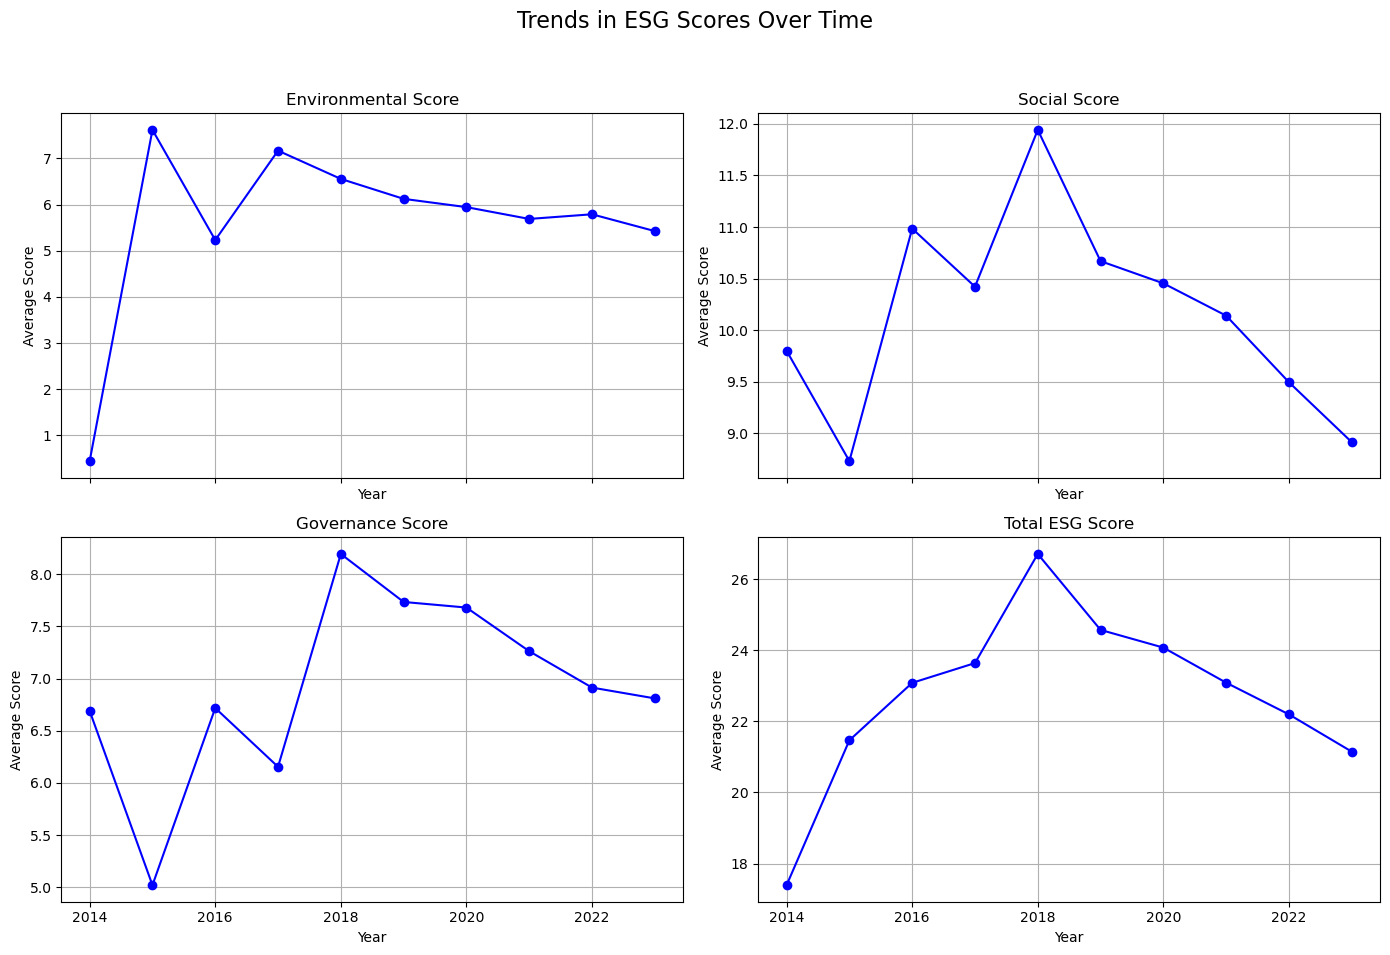

In [9]:
# Ensure the 'year' column is of integer type (in case it's read as a string)
df['year'] = df['year'].astype(int)

# Calculate average ESG scores for each year
yearly_trends = df.groupby('year')[['e_score', 's_score', 'g_score', 'total_score']].mean()

# Plotting trends over time for each ESG component and total score
plt.figure(figsize=(12, 8))
for score in ['e_score', 's_score', 'g_score', 'total_score']:
    plt.plot(yearly_trends.index, yearly_trends[score], marker='o', label=score.replace('_', ' ').capitalize())

plt.title("Trends in ESG Scores Over Time")
plt.xlabel("Year")
plt.ylabel("Average Score")
plt.legend(title="ESG Component")
plt.grid(True)
plt.show()

# Plotting individual trends for each ESG component and total score
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True)
fig.suptitle("Trends in ESG Scores Over Time", fontsize=16)

scores = ['e_score', 's_score', 'g_score', 'total_score']
titles = ['Environmental Score', 'Social Score', 'Governance Score', 'Total ESG Score']

for i, (score, title) in enumerate(zip(scores, titles)):
    ax = axes[i//2, i%2]
    ax.plot(yearly_trends.index, yearly_trends[score], marker='o', linestyle='-', color='b')
    ax.set_title(title)
    ax.set_xlabel("Year")
    ax.set_ylabel("Average Score")
    ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

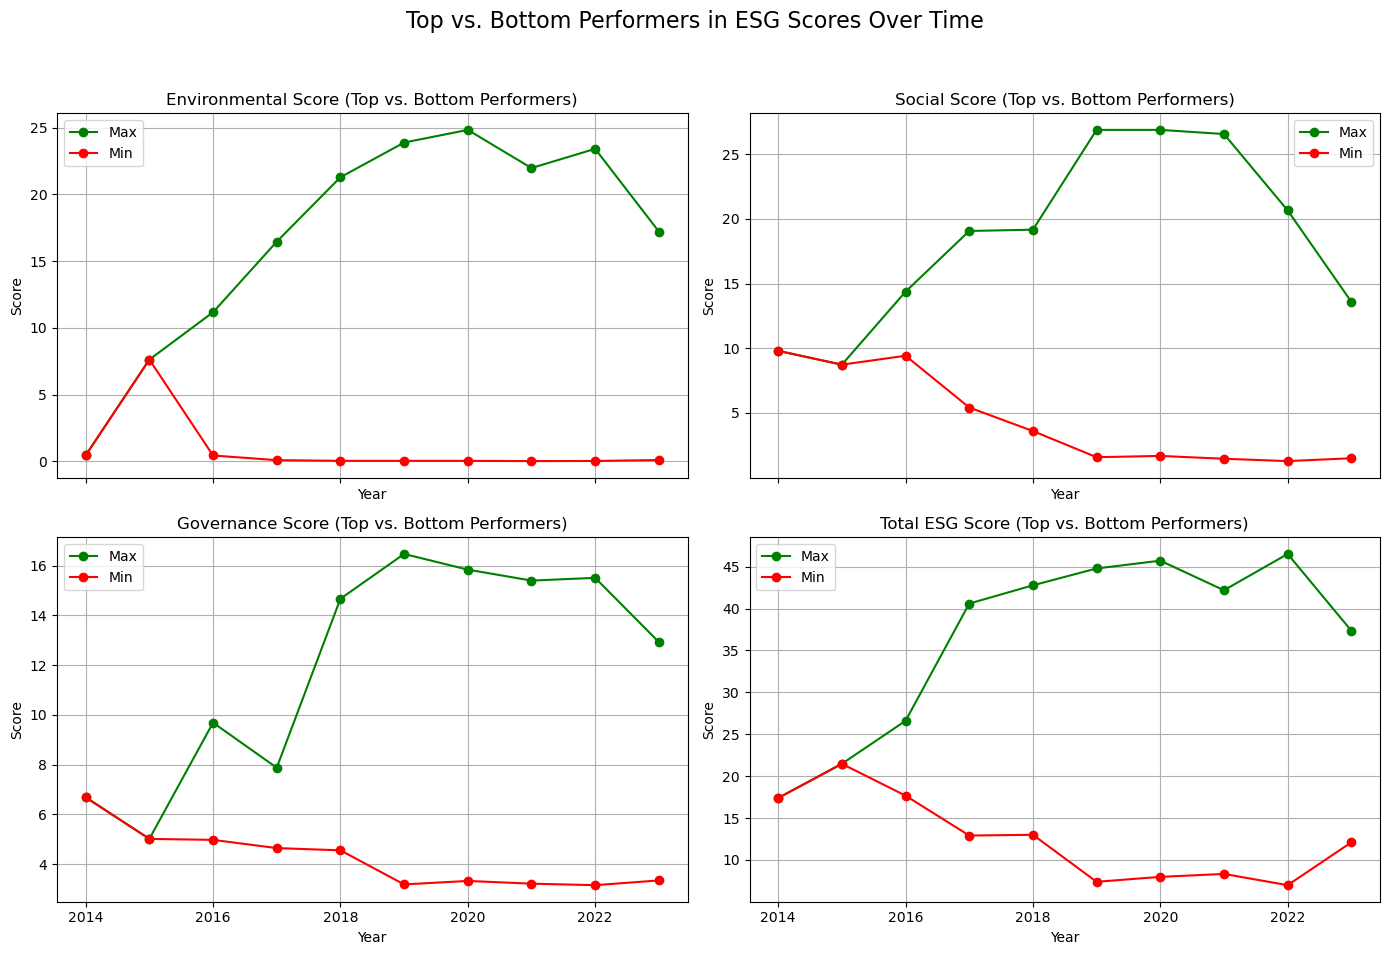

In [10]:
# Finding top and bottom performers by year
top_bottom_trends = df.groupby('year')[['e_score', 's_score', 'g_score', 'total_score']].agg(['max', 'min'])

# Plotting top vs. bottom performers over time for each ESG component
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True)
fig.suptitle("Top vs. Bottom Performers in ESG Scores Over Time", fontsize=16)

for i, (score, title) in enumerate(zip(scores, titles)):
    ax = axes[i//2, i%2]
    ax.plot(top_bottom_trends.index, top_bottom_trends[(score, 'max')], marker='o', linestyle='-', color='green', label="Max")
    ax.plot(top_bottom_trends.index, top_bottom_trends[(score, 'min')], marker='o', linestyle='-', color='red', label="Min")
    ax.set_title(f"{title} (Top vs. Bottom Performers)")
    ax.set_xlabel("Year")
    ax.set_ylabel("Score")
    ax.legend()
    ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Industry-Level Analysis

### Keyword Analysis for Each ESG Component

### Named Entity Recognition (NER) Analysis

### Word Length and Complexity Measures

### Frequent Phrases and Bigram Analysis

### Exploration of Any Anomalies or Outliers

### TF-IDF Analysis

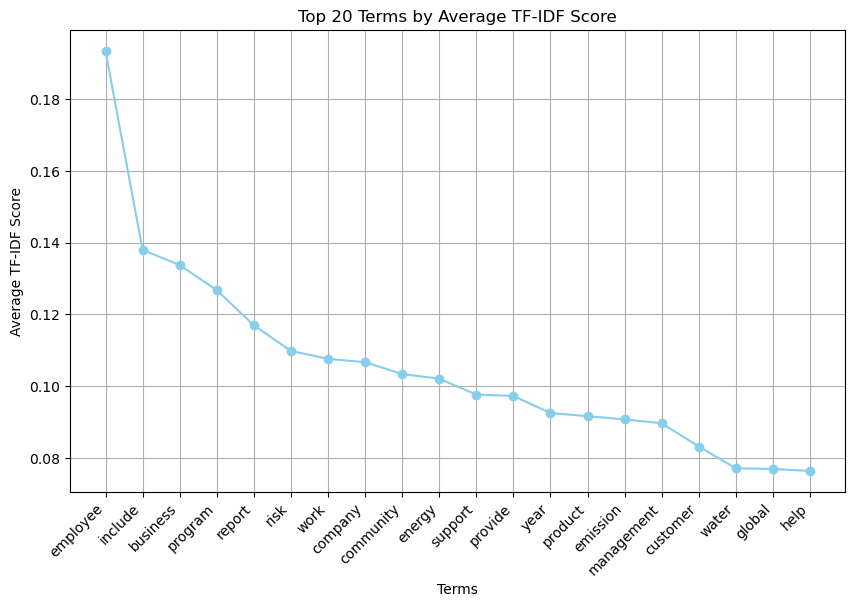

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Extract the 'preprocessed_content' column
text_data = df['preprocessed_content']

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=1000)  # Adjust max_features for more/fewer terms if needed

# Fit and transform the text data
tfidf_matrix = tfidf.fit_transform(text_data)

# Convert the TF-IDF matrix to a DataFrame for easier analysis
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Display top terms by average TF-IDF score
top_terms = tfidf_df.mean().sort_values(ascending=False).head(20)
#print("Top 20 terms by TF-IDF score:\n", top_terms)

import matplotlib.pyplot as plt

# Plotting the frequency distribution of top 20 terms as a line plot
plt.figure(figsize=(10, 6))
plt.plot(top_terms.index, top_terms.values, marker='o', linestyle='-', color='skyblue')
plt.title("Top 20 Terms by Average TF-IDF Score")
plt.xlabel("Terms")
plt.ylabel("Average TF-IDF Score")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

### Word Cloud Representation

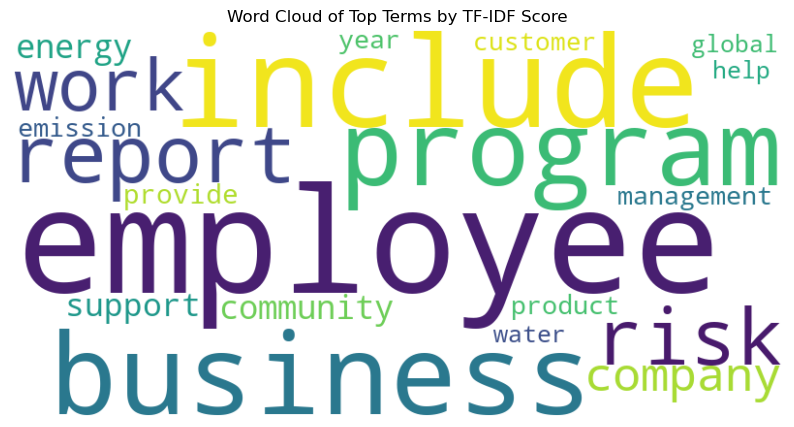

In [ ]:
from wordcloud import WordCloud

# Convert top terms into a dictionary for word cloud input
top_terms_dict = top_terms.to_dict()

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_terms_dict)

# Display the word cloud (with higher average TF-IDF scores appearing larger)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Top Terms by TF-IDF Score")
plt.show()

# Phase 2: Doc2Vec Representation

Doc2Vec Model Training: Doc2Vec will be used to create a document-level vector for each report. This approach is suitable for capturing each report’s context and content structure in a single vector, ideal for downstream predictive modeling.

Clustering Analysis (Optional): Using clustering algorithms (such as K-means or hierarchical clustering) on Doc2Vec vectors, we can examine whether reports naturally group into clusters that reflect distinct sustainability themes or industry-specific focus areas.

# Phase 3: Predicting ESG Scores

MLP Neural Network: Using the document embeddings from Doc2Vec, a Multi-Layer Perceptron (MLP) neural network will be trained to predict the ESG scores, as MLPs are well-suited for capturing non-linear relationships in high-dimensional data.

Performance Evaluation: The models’ accuracy and predictive performance will be compared across these approaches to determine the most effective model.

Exploration of other models: As a baseline, we may  test linear regression and Random Forest Regressor models to evaluate their performance compared to the neural network.  We may also explore fine-tuning a transformer-based model like BERT on the sustainability reports.